<div style="float: left;"></div>



#  <font color=#001978>Used machine learning to classify emails and turn them into insights</font>

### <font color=#001978>COMPREHEND - Ability to read and understand incoming emails</font>

    features     score
0      enron  0.047157
1      allen  0.011616
2      image  0.010718
3        gas  0.009776
4      email  0.009229
5    message  0.008970
6       john  0.008926
7  forwarded  0.008863
8       corp  0.008675
9     thanks  0.008258


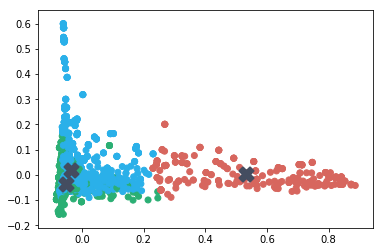

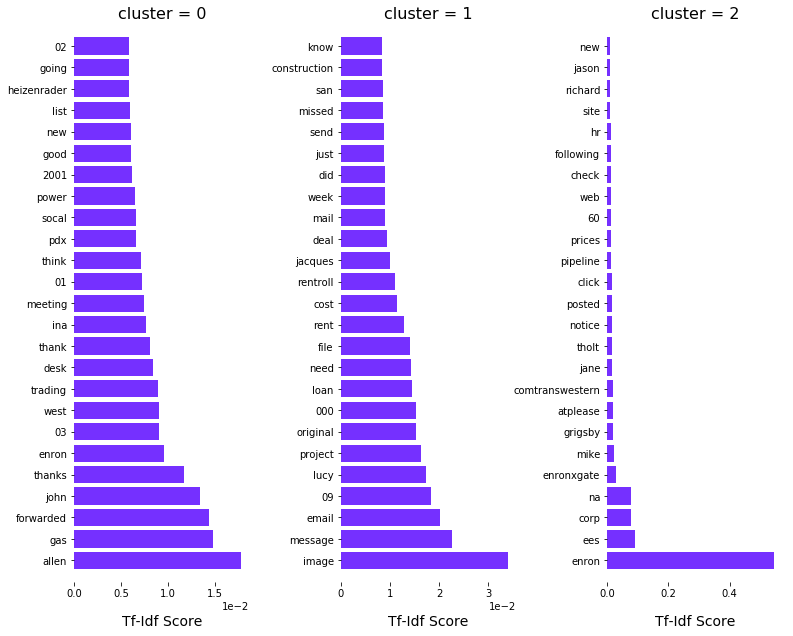

In [95]:
# Alberto Valverde Escribano.
# Software engineer and R&D Robotics.
# Code used machine learning to classify emails and turn them into insights.

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from helpers import *

#emails = pd.read_csv('alberto-valverde-gmail.csv')
emails = pd.read_csv('split_emails.csv')
emails = emails.head(4000)

# Lets create a new frame with the data we need.
email_df = pd.DataFrame(parse_into_emails(emails.message))

# Drop emails with empty body, to or from_ columns.
email_df.drop(email_df.query("body == '' | to == '' | from_ == ''").index, inplace=True)
stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)

X = vect.fit_transform(email_df.body)
features = vect.get_feature_names()

# Now we print the top terms across all documents.
print (top_mean_feats(X, features, None, 0.1, 10))

# As clustering algorithm KMeams is a perfect fit.
n_clusters = 3
clf = KMeans(n_clusters=n_clusters,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(X)

# For larger datasets use mini-batch KMeans, so we dont have to read all data into memory.
# batch_size = 500
# clf = MiniBatchKMeans(n_clusters=n_clusters, init_size=1000, batch_size=batch_size, max_iter=100)
# clf.fit(X)

# Let's plot this with matplotlib to visualize it.
# First we need to make 2D coordinates from the sparse matrix.
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

# Lets plot it again, but this time we add some color to it.
# This array needs to be at least the length of the n_clusters.
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC",
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

plt.scatter(coords[:, 0], coords[:, 1], c=colors)
# Plot the cluster centers
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()

#Use this to print the top terms per cluster with matplotlib.
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))



### <font color=#001978>Comprehing single messages from Inbox</font>
Returning the top terms out of a specific email.

In [96]:
# Alberto Valverde Escribano.
# Software engineer and R&D Robotics.
# Code used machine learning to classify specific email and turn them into insights.

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

from helpers import * 

emails = pd.read_csv('split_emails.csv')
emails = emails.head(4000)
# Lets create a new frame with the data we need.
email_df = pd.DataFrame(parse_into_emails(emails.message))

# Drop emails with empty body, to or from_ columns. 
email_df.drop(email_df.query("body == '' | to == '' | from_ == ''").index, inplace=True)
print (email_df.head(9))

# After running this function, I created a new dataframe that looks like this:


                                                 body  \
0   Buenos días, llamé el 24 de abril a Intrum por...   
1   Hola buenas resulta que el día 27/07/2016 Iba ...   
2   Hola, me llamo Ramón. Estoy divorciado desde f...   
3   Randy,Can you send me a schedule of the salary...   
5   Greg,How about either next Tuesday or Thursday...   
6   Phillip Allen (pallen@enron.com)Mike Grigsby (...   
8   I don't think these are required by the ISP2. ...   
9   ---------------------- Forwarded by Phillip K ...   
10  Mr. Buckner,For delivered gas behind San Diego...   

                                                  to                    from_  
0                               tim.belden@enron.com  phillip.allen@enron.com  
1                            john.lavorato@enron.com  phillip.allen@enron.com  
2                             leah.arsdall@enron.com  phillip.allen@enron.com  
3                              randall.gay@enron.com  phillip.allen@enron.com  
5                            

### <font color=#001978>MACHINE LEARNING</font>
Transform de dataframes (from emails raw message) into workable text and extract the features

In [101]:
# At this point we are going to tokenize the bodies and convert them
# into a document-term matrix.

# Some note on min_df and max_df
# max_df=0.5 means "ignore all terms that appear in more then 50% of the documents"
# min_df=2 means "ignore all terms that appear in less then 2 documents"
stopwords = ENGLISH_STOP_WORDS.union(['que', 'el', 'una', 'ha' , "la", 'por', "lo" , "es", "los" , "al", "en", "mi", "es", "del",'para', 'hacer', 'tengo' , "pero"])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=1)

X = vect.fit_transform(email_df.body)
features = vect.get_feature_names()

# The procesing message
msg_num = 2

# Saving Feature date for future Natural Language Processing
FeatureDataFramesForAI = top_feats_in_doc(X, features, msg_num, 10)

# Let's print the top 10 terms in document 1
print (FeatureDataFramesForAI)

# After running this function on a document, it came up with the following result.

        features     score
0          coche  0.521583
1    gananciales  0.219005
2       préstamo  0.219005
3        pagando  0.219005
4         bienes  0.219005
5          estoy  0.219005
6  compensatoria  0.109502
7            aún  0.109502
8        derecho  0.109502
9           sigo  0.109502


### <font color=#001978> All making sense if you look into the corresponding email:</font>

In [100]:
print (emails.message[msg_num])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Hola buenas resulta que el día 27/07/2016 Iba con mi coche y hay una calle de 50m de prohibida y me metí
 por ella que no tuve que hacerlo.de pronto la policía me para .Digo que pasa te hemos visto meterte por 
la calle .Me pidieron los papeles del coche todo en regla y me hechao una multa de 500€ y ponía perdida de 
puntos 0 y resulta que me quitaron el carnet de conducir el mes 5 del 2017. No sabía porque por perdida de 
todos los puntos fuy a tráfico y me ponía que la multa que me echaron tenía perdida

In [ ]:
#!pip install --upgrade azure-cognitiveservices-language-textanalytics

In [106]:
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials

import os

key_var_name = '855b09a467dd4d328e0fb84aaa15c8f3'

subscription_key = key_var_name

endpoint_var_name = 'https://analisislefebvre.cognitiveservices.azure.com/'

endpoint = endpoint_var_name

credentials = CognitiveServicesCredentials(subscription_key)

text_analytics = TextAnalyticsClient(endpoint_var_name, credentials=credentials)

documents = [
    {
        "id": "1",
        "language": "es",
        "text": "emails.message[msg_num]"
    }
]
response = text_analytics.sentiment(documents=documents)
for document in response.documents:
    print("Document Id: ", document.id, ", Sentiment Score: ",
          "{:.2f}".format(document.score))
    empaticValue = "{:.2f}".format(document.score)
    if float(empaticValue) > 0.5:
       empaticValueStr= "Satisfied"
    if float(empaticValue) < 0.5:
       empaticValueStr= "unsatisfied"
    if float(empaticValue) >= 1 :
       empaticValueStr= "happy"
print  (empaticValueStr)     
    

Document Id:  1 , Sentiment Score:  0.50
Satisfied



### <font color=#001978>(NPL) NATURAL LANGUAGE PROCESSING</font>
####  Required follow-up actions based on its understanding of the email/s

In [ ]:
#!pip install pyspellchecker

In [ ]:
#!pip install dialogflow

In [107]:
# Alberto Valverde Escribano.
# Software engineer and R&D Robotics.
# Code used Natural Langueage Processing to gives the ability to read, understand and derive meaning from email´s features result.

import dialogflow
from google.api_core.exceptions import InvalidArgument
from SpellCorrector import *

import os
from google.oauth2 import service_account

# Attributes
DIALOGFLOW_PROJECT_ID = 'lefebvre-ivivrs'
DIALOGFLOW_LANGUAGE_CODE = 'en-ES'
GOOGLE_APPLICATION_CREDENTIALS = 'lefebvre-ivivrs-c18aa8f99956.json'
SESSION_ID = '115760287604807540329'

credentials = service_account.Credentials.from_service_account_file("lefebvre-ivivrs-c18aa8f99956.json")
scoped_credentials = credentials.with_scopes(['https://www.googleapis.com/auth/cloud-platform'])

# Correcting the spelling
# correctedPhrase = getSpellCorrectedPhrase(phrase)

    
values= ""
for index, row in FeatureDataFramesForAI.iterrows():
    #print(row['features'])
    values= values + " " + row['features']   
    
correctedPhrase = values

# Initializing a client
session_client = dialogflow.SessionsClient(credentials=credentials)

session = session_client.session_path(DIALOGFLOW_PROJECT_ID, SESSION_ID)

text_input = dialogflow.types.TextInput(text=correctedPhrase, language_code=DIALOGFLOW_LANGUAGE_CODE)

query_input = dialogflow.types.QueryInput(text=text_input)

try:
    response = session_client.detect_intent(session=session, query_input=query_input)
except InvalidArgument:
    raise

print("Query text:", response.query_result.query_text)
print("Detected intent:", response.query_result.intent.display_name)
print("Detected intent confidence:", response.query_result.intent_detection_confidence)
print("Response:", response.query_result.fulfillment_text)
    
#saving value for next RabbitMQ event
MyRabbitmqMessage = "Se detecta un evento relacionado con " + response.query_result.fulfillment_text + "." + " Entidad " + response.query_result.intent.display_name + "el cliente parece sentirse: " + empaticValueStr 
print ("Empatic: " + empaticValueStr) 

Query text: coche gananciales préstamo pagando bienes estoy compensatoria aún derecho sigo
Detected intent: Abogados de derecho de familia
Detected intent confidence: 0.7106894850730896
Response: Divorcios, separaciones, custodias y liquidación de gananciales
Empatic: Satisfied


In [ ]:
#!pip install googletrans

In [108]:
# Alberto Valverde Escribano.
# Software engineer and R&D Robotics.
# Code used googletrans to translate the result to english.

from googletrans import Translator

T = Translator()

try:
  MyRabbitmqMessage = T.translate(MyRabbitmqMessage,src='es',dest='en').text
  print(MyRabbitmqMessage)
except:
  print ('translation Error!!!')

an event related to Divorce, separation, custody and settlement of property is detected. Lawyers entity familiael right customer seems to feel: Satisfied


In [ ]:
#!pip install pika

In [109]:
# Alberto Valverde Escribano.
# Software engineer and R&D Robotics.
# Code used pika to sends messages to the "email-clustering" queue.

import pika

credentials = pika.PlainCredentials('test', 'test')
connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='lefebvre.westeurope.cloudapp.azure.com', credentials=credentials))
channel = connection.channel()

channel.queue_declare(queue='email-clustering')

channel.basic_publish(exchange='', routing_key='email-clustering', body=MyRabbitmqMessage)
print(" [x] Sent " + MyRabbitmqMessage)
print("Event was sended successful")
connection.close()

 [x] Sent an event related to Divorce, separation, custody and settlement of property is detected. Lawyers entity familiael right customer seems to feel: Satisfied
Event was sended successful
